In [0]:
import keras
from keras.layers import Dense,concatenate,Activation,Dropout,Input,LSTM,Flatten,BatchNormalization
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# fix random seed for reproducibility
np.random.seed(7)
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
Data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/preprocessed_data.csv")

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Data.drop(["project_is_approved"],axis=1),Data["project_is_approved"],test_size=0.25,random_state=42,stratify=Data["project_is_approved"])

In [0]:
essay=x_train["essay"].values

In [0]:
essay_words=[]
for sent in essay:
  essay_words.extend(sent.split())

In [0]:
unique_words=list(set(essay_words))

In [0]:
# Assign a unique number to each word in the vocab.

vocab_dict=dict(zip(unique_words,list(np.arange(1,len(unique_words)+1))))

In [9]:
vocab=vocab_dict.keys()
len(vocab)

50476

In [0]:
new_essay_train=[]
for sent in essay:
  if(len(set(sent.split()).intersection(set(vocab)))>=1):
    vector=[]
    for word in sent.split():
      if(word in vocab):
        vector.append(vocab_dict[word])
    new_essay_train.append(vector)  
  else:
    vector=[]
    for word in sent.split():
      vector.append(0)
    new_essay_train.append(vector)      

In [0]:
new_essay_test=[]
for sent in x_test["essay"].values:
  if(len(set(sent.split()).intersection(set(vocab)))>=1):
    vector=[]
    for word in sent.split():
      if(word in vocab):
        vector.append(vocab_dict[word])
    new_essay_test.append(vector)  
  else:
    vector=[]
    for word in sent.split():
      vector.append(0)
    new_essay_test.append(vector)     

In [12]:
pd.DataFrame(new_essay_train).shape


(81936, 331)

In [13]:
pd.DataFrame(new_essay_test).shape

(27312, 333)

In [0]:
max_review_length = 400
essay_train = sequence.pad_sequences(new_essay_train, maxlen=max_review_length)
essay_test = sequence.pad_sequences(new_essay_test, maxlen=max_review_length)

In [15]:
essay_test.shape

(27312, 400)

In [0]:
states=list(set(x_train["school_state"].values))

In [0]:
a=[value for value in range(1,len(states)+1)]
school_states_codes=dict(zip(states,a))

In [0]:
school_state_train=[]
for st in x_train["school_state"].values:
  if(st in states):
     school_state_train.append(school_states_codes[st])
  else:
     school_state_train.append(0)   
 
   
school_state_test=[]
for st in x_test["school_state"].values:
  if(st in states):
    school_state_test.append(school_states_codes[st])
  else:
    school_state_test.append(0)    

In [0]:
prefixes=list(set(x_train["teacher_prefix"].values))
b=[value for value in range(1,len(prefixes)+1)]
teacher_prefix_codes=dict(zip(prefixes,b))

In [0]:
teacher_prefix_train=[]
for pre in x_train["teacher_prefix"].values:
  if(pre in prefixes):
     teacher_prefix_train.append(teacher_prefix_codes[pre])
  else:
     teacher_prefix_train.append(0)   
     
  
teacher_prefix_test = []
for pre in x_test["teacher_prefix"].values:
  if(pre in prefixes):
     teacher_prefix_test.append(teacher_prefix_codes[pre])
  else:
     teacher_prefix_test.append(0)     

In [0]:
grades=list(set(x_train["project_grade_category"].values))
c=[value for value in range(1,len(grades)+1)]
project_grade_codes=dict(zip(grades,c))

In [0]:
project_grade_train=[]
for pre in x_train["project_grade_category"].values:
  if(pre in grades):
    project_grade_train.append(project_grade_codes[pre])
  else:
    project_grade_train.append(0)  

   

project_grade_test=[]
for pre in x_test["project_grade_category"].values:
  if(pre in grades):
     project_grade_test.append(project_grade_codes[pre])
  else:
     project_grade_test.append(0)     

In [0]:
categories=list(set(x_train["clean_categories"].values))
d=[value for value in range(1,len(categories)+1)]
categories_codes=dict(zip(categories,d))

In [0]:
categories_train=[]
for pre in x_train["clean_categories"].values:
  if(pre in categories):
    categories_train.append(categories_codes[pre])
  else:
    categories_train.append(0)  
   

categories_test=[]
for pre in x_test["clean_categories"].values:
  if(pre in categories):
     categories_test.append(categories_codes[pre])
  else:
    categories_test.append(0)   

In [0]:
subcategories=list(set(x_train["clean_subcategories"].values))
e=[value for value in range(1,len(subcategories)+1)]
subcategories_codes=dict(zip(subcategories,e))

In [0]:
subcategories_train=[]
for pre in x_train["clean_subcategories"].values:
  if(pre in subcategories):
    subcategories_train.append(subcategories_codes[pre])
  else:
    subcategories_train.append(0)  

   

subcategories_test=[]
for pre in x_test["clean_subcategories"].values:
  if(pre in subcategories):
     subcategories_test.append(subcategories_codes[pre])
  else:
    subcategories_test.append(0)     

In [0]:
num_variable_train = np.array([list(value) for value in zip(x_train["teacher_number_of_previously_posted_projects"].values,x_train["price"].values)])

num_variable_test = np.array([list(value) for value in zip(x_test["teacher_number_of_previously_posted_projects"].values,x_test["price"].values)])

In [0]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

num_variable_train = scaler.fit_transform(num_variable_train)
num_variable_test = scaler.transform(num_variable_test)

========================================================================================================
# Model-1
=======================================================================================================

In [0]:
text_input_layer=Input(shape=(400,))
school_input_layer=Input(shape=(1,))
teacher_prefix_input_layer=Input(shape=(1,))
project_grade_input_layer=Input(shape=(1,))
categories_input_layer=Input(shape=(1,))
subcategories_input_layer=Input(shape=(1,))
number_input_layer=Input(shape=(2,))

embedding_layer_text=Embedding(len(vocab), 100 , input_length=400)(text_input_layer)
dropout_before_lstm=Dropout(0.2)(embedding_layer_text)
lstm_layer=LSTM(100,input_shape=(400,100))(dropout_before_lstm)
#flatten=Flatten()(lstm_layer) # did not use this because output of LSTM for each sequence is a vector.
embedding_layer_school=Embedding(len(states),4 , input_length=1)(school_input_layer)
flatten_1=Flatten()(embedding_layer_school)
embedding_layer_teacher_prefix=Embedding(len(prefixes),2,input_length=1)(teacher_prefix_input_layer)
flatten_2=Flatten()(embedding_layer_teacher_prefix)
embedding_layer_project_grade=Embedding(len(grades),2,input_length=1)(project_grade_input_layer)
flatten_3=Flatten()(embedding_layer_project_grade)
embedding_layer_categories=Embedding(len(categories),8,input_length=1)(categories_input_layer)
flatten_4=Flatten()(embedding_layer_categories)
embedding_layer_subcategories=Embedding(len(subcategories),16,input_length=1)(subcategories_input_layer)
flatten_5=Flatten()(embedding_layer_subcategories)
dense_layer_num=Dense(16,activation="relu",kernel_initializer="he_normal")(number_input_layer)

concat_layer=concatenate([lstm_layer,flatten_1,flatten_2,flatten_3,flatten_4,flatten_5,dense_layer_num])

dropout_layer_after_concat=Dropout(0.2)(concat_layer)
dense_layer_after_concat=Dense(32,activation="relu",kernel_initializer="he_normal")(dropout_layer_after_concat)
dropout_after_dense=Dropout(0.5)(dense_layer_after_concat)
dense_layer_2=Dense(32,activation="relu",kernel_initializer="he_normal")(dropout_after_dense)
dropout_2=Dropout(0.5)(dense_layer_2)
dense_layer_3=Dense(16,activation="relu",kernel_initializer="he_normal")(dropout_2)
bn=BatchNormalization()(dense_layer_3)

output_layer=Dense(1,activation="sigmoid")(bn)

model_1=Model(inputs=[text_input_layer,school_input_layer,teacher_prefix_input_layer,project_grade_input_layer,categories_input_layer,subcategories_input_layer,number_input_layer],outputs=output_layer)

In [0]:
model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 400)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 400, 100)     5047600     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1)            0                                            
____________________________________________________________________________________________

In [0]:
import tensorflow as tf
from sklearn import metrics
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [0]:
model_1.compile(optimizer="adam",loss="binary_crossentropy",metrics=[auc])

In [0]:
history_1 = model_1.fit([np.array(essay_train),np.array(school_state_train),np.array(teacher_prefix_train),np.array(project_grade_train),np.array(categories_train),np.array(subcategories_train),np.array(num_variable_train)],y_train,epochs=15,batch_size=128,verbose=1,validation_data=([np.array(essay_test),np.array(school_state_test),np.array(teacher_prefix_test),np.array(project_grade_test),np.array(categories_test),np.array(subcategories_test),np.array(num_variable_test)],y_test))



Train on 81936 samples, validate on 27312 samples
Epoch 1/15
81936/81936 [==============================] - 431s 5ms/step - loss: 0.4794 - auc: 0.5096 - val_loss: 0.4241 - val_auc: 0.5105
Epoch 2/15
81936/81936 [==============================] - 412s 5ms/step - loss: 0.4195 - auc: 0.5276 - val_loss: 0.4023 - val_auc: 0.5541
Epoch 3/15
81936/81936 [==============================] - 410s 5ms/step - loss: 0.4122 - auc: 0.5721 - val_loss: 0.4262 - val_auc: 0.5811
Epoch 4/15
81936/81936 [==============================] - 410s 5ms/step - loss: 0.3933 - auc: 0.5944 - val_loss: 0.4029 - val_auc: 0.6110
Epoch 5/15
81936/81936 [==============================] - 404s 5ms/step - loss: 0.3685 - auc: 0.6288 - val_loss: 0.4105 - val_auc: 0.6433
Epoch 6/15
81936/81936 [==============================] - 405s 5ms/step - loss: 0.3458 - auc: 0.6581 - val_loss: 0.4064 - val_auc: 0.6709
Epoch 7/15
81936/81936 [==============================] - 406s 5ms/step - loss: 0.3184 - auc: 0.6846 - val_loss: 0.4080 

In [0]:
scores=model_1.evaluate([np.array(essay_test),np.array(school_state_test),np.array(teacher_prefix_test),np.array(project_grade_test),np.array(categories_test),np.array(subcategories_test),np.array(num_variable_test)],y_test,verbose=0)
print("Loss =",scores[0],"\nAUC =",scores[1])

Loss = 0.5313214336177656 
AUC = 0.8244108017523106


=======================================================================================================
# Model-2
=======================================================================================================

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tfidf_vec=TfidfVectorizer()
tfidf_essay=tfidf_vec.fit_transform(essay)

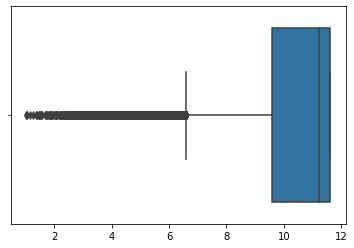

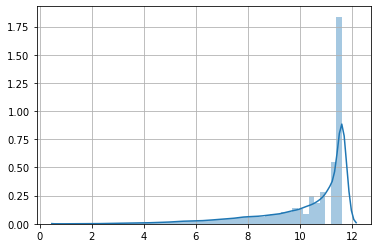

In [25]:
sns.boxplot(x=tfidf_vec.idf_)
plt.show()

sns.distplot(tfidf_vec.idf_)
plt.grid()
plt.show()

In [26]:
p_1=np.percentile(tfidf_vec.idf_,10)
p_2=np.percentile(tfidf_vec.idf_,60)
print(p_1,"  ",p_2)

vocab_2=[]
for value in zip(tfidf_vec.vocabulary_.keys(),tfidf_vec.idf_):
  if(value[1]>=p_1 and value[1]<=p_2):
    vocab_2.append(value[0])

7.568773809912135    11.215093649607276


In [27]:
len(vocab_2)

25732

In [0]:
word_dict_2=dict(zip(vocab_2,list(range(1,len(vocab_2)+1))))

In [0]:
new_essay_train_2=[]
for sent in essay:
  if(len(set(sent.split()).intersection(set(vocab_2)))>=1):
    vector=[]
    for word in sent.split():
      if(word in vocab_2):
        vector.append(word_dict_2[word])
    new_essay_train_2.append(vector)  
  else:
    vector=[]
    for word in sent.split():
      vector.append(0)
    new_essay_train_2.append(vector)

In [0]:
new_essay_test_2=[]
for sent in x_test["essay"].values:
  if(len(set(sent.split()).intersection(set(vocab_2)))>=1):
    vector=[]
    for word in sent.split():
      if(word in vocab_2):
        vector.append(word_dict_2[word])
    new_essay_test_2.append(vector)  
  else:
    vector=[]
    for word in sent.split():
      vector.append(0)
    new_essay_test_2.append(vector)

In [31]:
pd.DataFrame(new_essay_train_2).shape

(81936, 196)

In [0]:
max_review_length = 300
essay_train_2 = sequence.pad_sequences(new_essay_train_2, maxlen=max_review_length)
essay_test_2= sequence.pad_sequences(new_essay_test_2, maxlen=max_review_length)

In [0]:
text_input_layer=Input(shape=(300,))
school_input_layer=Input(shape=(1,))
teacher_prefix_input_layer=Input(shape=(1,))
project_grade_input_layer=Input(shape=(1,))
categories_input_layer=Input(shape=(1,))
subcategories_input_layer=Input(shape=(1,))
number_input_layer=Input(shape=(2,))

embedding_layer_text=Embedding(len(vocab_2), 30 , input_length=300)(text_input_layer)
lstm_layer=LSTM(70,input_shape=(300,30))(embedding_layer_text)
#flatten=Flatten()(lstm_layer) # did not use this because output of LSTM for each sequence is a vector.
embedding_layer_school=Embedding(len(states),3 , input_length=1)(school_input_layer)
flatten_1=Flatten()(embedding_layer_school)
embedding_layer_teacher_prefix=Embedding(len(prefixes),2,input_length=1)(teacher_prefix_input_layer)
flatten_2=Flatten()(embedding_layer_teacher_prefix)
embedding_layer_project_grade=Embedding(len(grades),2,input_length=1)(project_grade_input_layer)
flatten_3=Flatten()(embedding_layer_project_grade)
embedding_layer_categories=Embedding(len(categories),3,input_length=1)(categories_input_layer)
flatten_4=Flatten()(embedding_layer_categories)
embedding_layer_subcategories=Embedding(len(subcategories),8,input_length=1)(subcategories_input_layer)
flatten_5=Flatten()(embedding_layer_subcategories)
dense_layer_num=Dense(6,activation="relu",kernel_initializer="he_normal")(number_input_layer)

concat_layer=concatenate([lstm_layer,flatten_1,flatten_2,flatten_3,flatten_4,flatten_5,dense_layer_num])

dropout_layer_after_concat=Dropout(0.2)(concat_layer)
dense_layer_after_concat=Dense(16,activation="relu",kernel_initializer="he_normal")(dropout_layer_after_concat)
dropout_after_dense=Dropout(0.5)(dense_layer_after_concat)
dense_layer_2=Dense(16,activation="relu",kernel_initializer="he_normal")(dropout_after_dense)
dropout_2=Dropout(0.5)(dense_layer_2)
dense_layer_3=Dense(6,activation="relu",kernel_initializer="he_normal")(dropout_2)
bn=BatchNormalization()(dense_layer_3)

output_layer=Dense(1, activation="sigmoid")(bn)

model_2=Model(inputs=[text_input_layer,school_input_layer,teacher_prefix_input_layer,project_grade_input_layer,categories_input_layer,subcategories_input_layer,number_input_layer],outputs=output_layer)

In [34]:
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 1)            0                                            
____________________________________________________________________________________________

In [0]:
model_2.compile(optimizer="adam",loss="binary_crossentropy",metrics=[auc])

In [36]:
history_2=model_2.fit([np.array(essay_train_2),np.array(school_state_train),np.array(teacher_prefix_train),np.array(project_grade_train),np.array(categories_train),np.array(subcategories_train),np.array(num_variable_train)],y_train,epochs=15,batch_size=128,verbose=1,validation_data=([np.array(essay_test_2),np.array(school_state_test),np.array(teacher_prefix_test),np.array(project_grade_test),np.array(categories_test),np.array(subcategories_test),np.array(num_variable_test)],y_test))



Train on 81936 samples, validate on 27312 samples
Epoch 1/15
81936/81936 [==============================] - 339s 4ms/step - loss: 0.5049 - auc: 0.4965 - val_loss: 0.4248 - val_auc: 0.5013
Epoch 2/15
81936/81936 [==============================] - 340s 4ms/step - loss: 0.4243 - auc: 0.5063 - val_loss: 0.4155 - val_auc: 0.5183
Epoch 3/15
81936/81936 [==============================] - 343s 4ms/step - loss: 0.4076 - auc: 0.5445 - val_loss: 0.3977 - val_auc: 0.5682
Epoch 4/15
81936/81936 [==============================] - 338s 4ms/step - loss: 0.3902 - auc: 0.5914 - val_loss: 0.3881 - val_auc: 0.6100
Epoch 5/15
81936/81936 [==============================] - 340s 4ms/step - loss: 0.3801 - auc: 0.6259 - val_loss: 0.3919 - val_auc: 0.6380
Epoch 6/15
81936/81936 [==============================] - 340s 4ms/step - loss: 0.3692 - auc: 0.6497 - val_loss: 0.3911 - val_auc: 0.6589
Epoch 7/15
81936/81936 [==============================] - 339s 4ms/step - loss: 0.3598 - auc: 0.6682 - val_loss: 0.3957 

In [37]:
scores=model_2.evaluate([np.array(essay_test_2),np.array(school_state_test),np.array(teacher_prefix_test),np.array(project_grade_test),np.array(categories_test),np.array(subcategories_test),np.array(num_variable_test)],y_test,verbose=0)
print("Loss =",scores[0],"\nAUC =",scores[1])

Loss = 0.4579841393647867 
AUC = 0.7479469939917937


===================================================================================================
# Model-3
===================================================================================================

In [0]:
count_vec_1 = CountVectorizer(lowercase=False,binary=True)
school_state_train_ohe = count_vec_1.fit_transform(x_train["school_state"].values)
school_state_test_ohe = count_vec_1.transform(x_test["school_state"].values)  

count_vec_2 = CountVectorizer(lowercase=False,binary=True)
teacher_prefix_train_ohe = count_vec_2.fit_transform(x_train["teacher_prefix"].values)
teacher_prefix_test_ohe = count_vec_2.transform(x_test["teacher_prefix"].values) 

count_vec_3 = CountVectorizer(lowercase=False,binary=True)
project_grade_train_ohe = count_vec_3.fit_transform(x_train["project_grade_category"].values)
project_grade_test_ohe = count_vec_3.transform(x_test["project_grade_category"].values)

count_vec_4 = CountVectorizer(lowercase=False,binary=True)
categories_train_ohe = count_vec_4.fit_transform(x_train["clean_categories"].values)
categories_test_ohe = count_vec_4.transform(x_test["clean_categories"].values) 

count_vec_5 = CountVectorizer(lowercase=False,binary=True)
subcategories_train_ohe = count_vec_5.fit_transform(x_train["clean_subcategories"].values)
subcategories_test_ohe = count_vec_5.transform(x_test["clean_subcategories"].values)

In [0]:
from scipy.sparse import hstack
other_than_text_train=hstack((school_state_train_ohe,teacher_prefix_train_ohe,project_grade_train_ohe,categories_train_ohe,subcategories_train_ohe,num_variable_train)).toarray()
other_than_text_test=hstack((school_state_test_ohe,teacher_prefix_test_ohe,project_grade_test_ohe,categories_test_ohe,subcategories_test_ohe,num_variable_test)).toarray()

In [0]:
from keras.layers import Conv1D

input_1=Input(shape=(400,))
input_2=Input(shape=(other_than_text_train.shape[1],1))

embedding_text=Embedding(len(vocab),100,input_length=400)(input_1)
lstm=LSTM(100,input_shape=(400,100))(embedding_text)
#flatten=Flatten()(lstm) # did not use this because output of LSTM for each sequence is a vector.
conv_layer_1=Conv1D(64,kernel_size=3,strides=2,activation="relu",kernel_initializer="he_normal",input_shape=(101,1))(input_2)
dropout_1=Dropout(0.5)(conv_layer_1)
conv_layer_2=Conv1D(32,kernel_size=3,strides=2,activation="relu",kernel_initializer="he_normal")(dropout_1)
flatten_1=Flatten()(conv_layer_2)

concat_layer=concatenate([lstm,flatten_1])

dropout_after_concat=Dropout(0.2)(concat_layer)
dense_1=Dense(32,activation="relu",kernel_initializer="he_normal")(dropout_after_concat)
dropout_3=Dropout(0.5)(dense_1)
dense_2=Dense(16,activation="relu",kernel_initializer="he_normal")(dropout_3)
dropout_4=Dropout(0.5)(dense_2)
dense_3=Dense(6,activation="relu",kernel_initializer="he_normal")(dropout_4)
bn=BatchNormalization()(dense_3)
output_layer=Dense(1,activation="sigmoid")(bn)

model_3=Model(inputs=[input_1,input_2],outputs=output_layer)

In [23]:
model_3.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 101, 1)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 50, 64)       256         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 400)          0                                            
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 50, 64)       0           conv1d_1[0][0]                   
____________________________________________________________________________________________

In [0]:
model_3.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=[auc])

In [25]:
history_3 = model_3.fit([np.array(essay_train),np.array(other_than_text_train).reshape(other_than_text_train.shape[0],other_than_text_train.shape[1],1)],y_train,epochs=15,batch_size=128,verbose=1,validation_data=([np.array(essay_test),np.array(other_than_text_test).reshape(other_than_text_test.shape[0],other_than_text_test.shape[1],1)],y_test))



Train on 81936 samples, validate on 27312 samples
Epoch 1/15
81936/81936 [==============================] - 412s 5ms/step - loss: 0.4947 - auc: 0.5071 - val_loss: 0.4107 - val_auc: 0.5391
Epoch 2/15
81936/81936 [==============================] - 399s 5ms/step - loss: 0.4103 - auc: 0.5668 - val_loss: 0.4191 - val_auc: 0.5874
Epoch 3/15
81936/81936 [==============================] - 398s 5ms/step - loss: 0.3966 - auc: 0.6061 - val_loss: 0.4012 - val_auc: 0.6225
Epoch 4/15
81936/81936 [==============================] - 416s 5ms/step - loss: 0.3895 - auc: 0.6354 - val_loss: 0.3938 - val_auc: 0.6463
Epoch 5/15
81936/81936 [==============================] - 411s 5ms/step - loss: 0.3808 - auc: 0.6566 - val_loss: 0.4109 - val_auc: 0.6634
Epoch 6/15
81936/81936 [==============================] - 408s 5ms/step - loss: 0.3742 - auc: 0.6706 - val_loss: 0.4118 - val_auc: 0.6763
Epoch 7/15
81936/81936 [==============================] - 424s 5ms/step - loss: 0.3681 - auc: 0.6822 - val_loss: 0.3889 

In [26]:
scores=model_3.evaluate([np.array(essay_test),np.array(other_than_text_test).reshape(other_than_text_test.shape[0],other_than_text_test.shape[1],1)],y_test,verbose=0)
print("Loss =",scores[0],"\nAUC Score =",scores[1])

Loss = 0.4096996249793633 
AUC Score = 0.7594813393373272


===================================================================================
# Conclusions:


In [27]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names=("Model","Loss","AUC")
table.add_row(("Model-1",0.53,0.82))
table.add_row(("Model-2",0.45,0.74))
table.add_row(("Model-3",0.40,0.75))
print(table)

+---------+------+------+
|  Model  | Loss | AUC  |
+---------+------+------+
| Model-1 | 0.53 | 0.82 |
| Model-2 | 0.45 | 0.74 |
| Model-3 | 0.4  | 0.75 |
+---------+------+------+


Model 1  gave 0.82 AUC score on test data,model-2 gave AUC score 0.74 and model-3 0.75.
for model-1 and model-2 I used Adam as optimozer while for model-3  used RmsProp as optimizer.